In [1]:
import warnings
warnings.filterwarnings("ignore")

In [184]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pylab, pyplot
%matplotlib inline
pylab.plt.style.use("seaborn-colorblind")
%config InlineBackend.figure_format = 'retina'

> Numpy Array

> Pandas Series(Numpy Array)

__Difference between numpy and python array__
* Numpy Array holds homogeneous elements
* Bunch of convenient functions

In [3]:
a = np.arange(1, 5)

In [4]:
type (a)

numpy.ndarray

In [5]:
print a.max(), a.argmax(), a.std(), a.var(), a.mean()

4 3 1.11803398875 1.25 2.5


In [6]:
a = np.array([2, 3, 4, 5, 6])
a.dtype

dtype('int64')

In [7]:
a = np.array([1, "SWE"])
a.dtype

dtype('S21')

In [8]:
np.array([1, 2]) + np.array([2, 3])

array([3, 5])

In [9]:
[1, 2, 3] * 3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [10]:
type(3 * np.array([2, 3, 6]))

numpy.ndarray

In [11]:
# &, | ~

In [12]:
np.array([np.array([1, 2]), np.array([4, 5])])

array([[1, 2],
       [4, 5]])

In [13]:
a = np.array([1, 2, 3, 4, 5])
b = a > 3
c = a[b]
c[0] = 10
print a, c

[1 2 3 4 5] [10  5]


In [14]:
# += operator is inplace but + is not

In [15]:
x = np.array([1, 2, 3, 4])
s = x[:3]
s[0] = 100
print x

[100   2   3   4]


In [16]:
# Pandas series: describe
x = pd.Series([2, 3, 4, 5, 3, 4, 5, 100])
x.describe()

count      8.000000
mean      15.750000
std       34.057724
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max      100.000000
dtype: float64

In [17]:
# pandas series have something called index
d = pd.Series([2, 3, 4, 5], index=["A,", "B", "C", "D"])

In [18]:
print d[1], d['B'], d.loc['B'], d.iloc[1]
d.argmax()

3 3 3 3


'D'

In [19]:
d['B'] = 4

In [20]:
d.loc['C'] = 1

In [21]:
d

A,    2
B     4
C     1
D     5
dtype: int64

In [22]:
s1 = pd.Series(data=[1, 2, 3, 4], index=list("abcd"))
s2 = pd.Series(data=[10, 20, 30, 40], index=list("abcd"))
s1 + s2

a    11
b    22
c    33
d    44
dtype: int64

In [23]:
# Behaviour of two series with arithmatic operations
s1 = pd.Series(data=[1, 2, 3, 4], index=list("abcd"))
s2 = pd.Series(data=[10, 20, 30, 40], index=list("bdac"))
s1 + s2

a    31
b    12
c    43
d    24
dtype: int64

In [24]:
s1 = pd.Series(data=[1, 2, 3, 4], index=list("abcd"))
s2 = pd.Series(data=[10, 20, 30, 40], index=list("abef"))
s1 + s2

a    11.0
b    22.0
c     NaN
d     NaN
e     NaN
f     NaN
dtype: float64

In [25]:
s1 = pd.Series(data=[1, 2, 3, 4], index=list("abcd"))
s2 = pd.Series(data=[10, 20, 30, 40], index=list("efgh"))
s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64

In [26]:
s1.add(s2, fill_value=0)

a     1.0
b     2.0
c     3.0
d     4.0
e    10.0
f    20.0
g    30.0
h    40.0
dtype: float64

In [41]:
y = np.array([[1, 2, 3], [3, 4, 5]])
y[1, 2]

5

In [42]:
x = [[1, 2], [3, 4]]
x[0][0]
# x[0, 0] -> will not work

1

In [49]:
# more example: directly taken from Udacity
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Change False to True for each block of code to see what it does

# Accessing elements
if True:
    print ridership[1, 3]
    print ridership[1:3, 3:5]
    print ridership[1, :]
    
# Vectorized operations on rows or columns
if True:
    print ridership[0, :] + ridership[1, :]
    print ridership[:, 0] + ridership[:, 1]
    
# Vectorized operations on entire arrays
if True:
    a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
    print a + b

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    overall_mean = ridership.mean() # Replace this with your code
    mean_for_max = ridership.max(axis=0).mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)
mean_riders_for_max_station(ridership)

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]
[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


(2342.5999999999999, 3983.5999999999999)

In [ ]:
axis0|axis1->

In [51]:
ridership.max(axis=1)

array([   5, 3877, 6461, 4787, 4802, 4979,  496,   27, 4174, 4665])

In [52]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [53]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [54]:
ridership_df['R004']

05-01-11       0
05-02-11    3877
05-03-11    4088
05-04-11    3392
05-05-11    4802
05-06-11    3933
05-07-11     229
05-08-11       0
05-09-11    3785
05-10-11    4043
Name: R004, dtype: int64

In [59]:
ridership_df.loc[:, 'R004']

05-01-11       0
05-02-11    3877
05-03-11    4088
05-04-11    3392
05-05-11    4802
05-06-11    3933
05-07-11     229
05-08-11       0
05-09-11    3785
05-10-11    4043
Name: R004, dtype: int64

In [61]:
ridership_df.loc['05-08-11']

R003     2
R004     0
R005     1
R006    27
R007     0
Name: 05-08-11, dtype: int64

In [68]:
ridership_df.loc[:, ridership_df.iloc[0].argmax()]

05-01-11       5
05-02-11    2328
05-03-11    6461
05-04-11    4787
05-05-11    4477
05-06-11    4979
05-07-11     496
05-08-11      27
05-09-11    4174
05-10-11    4665
Name: R006, dtype: int64

In [70]:
ridership_df.iloc[0].argmax()

'R006'

In [72]:
ridership_df.values.mean()

2342.5999999999999

In [122]:
df = pd.read_csv("nyc_subway_weather.csv")

In [74]:
df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [75]:
df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [76]:
# Pearson R 
# ddof = 0 -> uncorrected (sample)
def p_r(x, y):
    return ((x - x.mean()) / x.std(ddof=0) * (y - y.mean()) / y.std(ddof=0)).mean()

In [77]:
# axis = 'index' axis='columns'
# add two df -> all match ok, unmatched nan

In [78]:
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})


In [83]:
shifted = entries_and_exits.loc[1:, :]

In [91]:
shifted.index = shifted.index.values - 1

In [94]:
shifted - entries_and_exits

,ENTRIESn,EXITSn
0,23.0,8.0
1,18.0,18.0
2,71.0,54.0
3,170.0,44.0
4,214.0,42.0
5,87.0,11.0
6,10.0,3.0
7,36.0,89.0
8,153.0,333.0
9,NaN,NaN


In [96]:
# :) Use shift function by df LOL
entries_and_exits.shift(-1)

,ENTRIESn,EXITSn
0,3144335.0,1088159.0
1,3144353.0,1088177.0
2,3144424.0,1088231.0
3,3144594.0,1088275.0
4,3144808.0,1088317.0
5,3144895.0,1088328.0
6,3144905.0,1088331.0
7,3144941.0,1088420.0
8,3145094.0,1088753.0
9,NaN,NaN


In [ ]:
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])


In [97]:
# applymap on each element of the dataframe
# apply

In [100]:
entries_and_exits['ENTRIESn'].sort_values(ascending=False)[1]

3144335

In [101]:
entries_and_exits.sub

In [194]:
columns = ["UNIT", "ENTRIESn", "EXITSn"]
df = pd.read_csv("nyc_subway_weather.csv")

In [180]:
ndf = df[columns].groupby(['fog']).sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x114632f10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114bf9f90>], dtype=object)

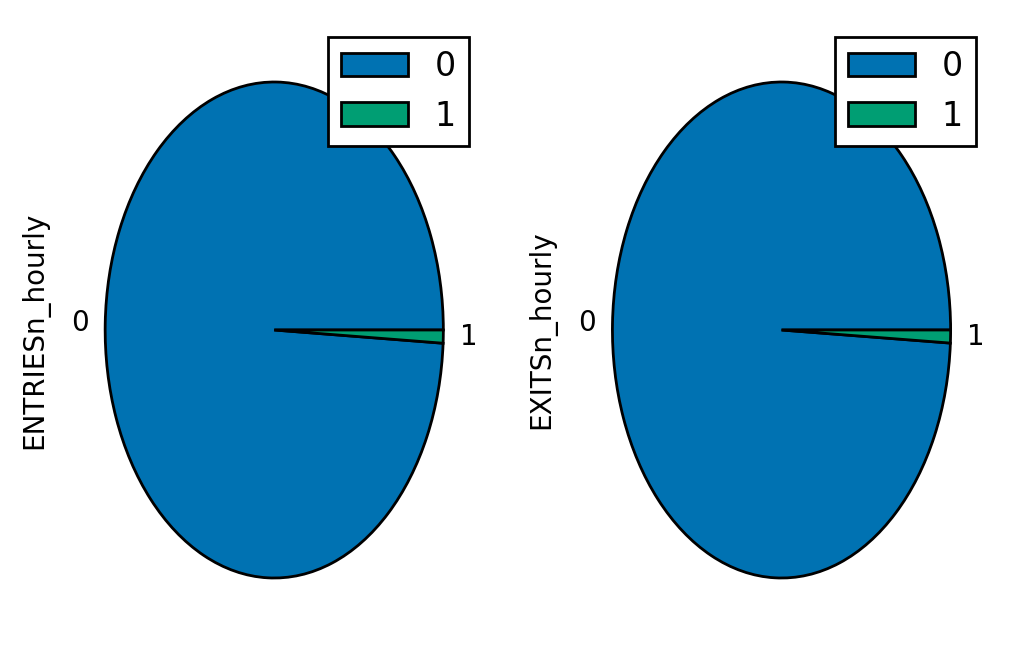

In [185]:
ndf.plot.pie(subplots=True)

In [195]:
group = df[columns].groupby('UNIT')

In [202]:
df.merge

0        R003
168      R004
343      R005
515      R006
695      R007
865      R008
1034     R009
1209     R011
1393     R012
1579     R013
1765     R016
1949     R017
2135     R018
2320     R019
2506     R020
2692     R021
2876     R022
3062     R023
3248     R024
3433     R025
3619     R027
3805     R029
3991     R030
4177     R031
4363     R032
4548     R033
4734     R034
4904     R035
5088     R036
5265     R037
         ... 
37569    R321
37755    R322
37934    R323
38106    R325
38281    R330
38458    R335
38622    R336
38786    R337
38954    R338
39128    R341
39311    R344
39475    R345
39650    R346
39824    R348
39998    R354
40165    R356
40341    R358
40508    R370
40684    R371
40856    R372
41025    R373
41193    R382
41370    R424
41535    R429
41718    R453
41880    R454
42047    R455
42215    R456
42392    R459
42480    R464
Name: UNIT, dtype: object
0        R003
168      R004
343      R005
515      R006
695      R007
865      R008
1034     R009
1209     R011
1393    

,UNIT,ENTRIESn,EXITSn
0,R003,4388333,2911002
168,R004,14656120,14451774
343,R005,13399891,12918315
515,R006,11203747,10009575
695,R007,8838474,8867037
865,R008,11252788,11124233
1034,R009,4623736,4301606
1209,R011,166978350,75355595
1393,R012,181302968,110830447
1579,R013,31214400,42965863
